In [3]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

#import necesarry Libraries


In [4]:
df = pd.read_csv('D:\\Data Projects\\Valuable Sports Table\\brisbane_water_quality.csv\\brisbane_water_quality.csv')
df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [5]:
#look at the integrity of the data to understand it
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

Timestamp                                      0
Record number                                  0
Average Water Speed                           20
Average Water Direction                        1
Chlorophyll                                  585
Chlorophyll [quality]                        808
Temperature                                 5164
Temperature [quality]                       5344
Dissolved Oxygen                            4300
Dissolved Oxygen [quality]                  4524
Dissolved Oxygen (%Saturation)              5749
Dissolved Oxygen (%Saturation) [quality]    5950
pH                                          1084
pH [quality]                                1308
Salinity                                    3958
Salinity [quality]                          4182
Specific Conductance                        1367
Specific Conductance [quality]              1591
Turbidity                                   2000
Turbidity [quality]                         2224
dtype: int64

In [6]:
#dropping rows with NaN Values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19149 entries, 225 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 19149 non-null  object 
 1   Record number                             19149 non-null  int64  
 2   Average Water Speed                       19149 non-null  float64
 3   Average Water Direction                   19149 non-null  float64
 4   Chlorophyll                               19149 non-null  float64
 5   Chlorophyll [quality]                     19149 non-null  float64
 6   Temperature                               19149 non-null  float64
 7   Temperature [quality]                     19149 non-null  float64
 8   Dissolved Oxygen                          19149 non-null  float64
 9   Dissolved Oxygen [quality]                19149 non-null  float64
 10  Dissolved Oxygen (%Saturation)       

In [7]:
#correlation index
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

                                          Record number  Average Water Speed  \
Record number                                  1.000000             0.366278   
Average Water Speed                            0.366278             1.000000   
Average Water Direction                        0.062316             0.013916   
Chlorophyll                                   -0.117710            -0.061671   
Chlorophyll [quality]                               NaN                  NaN   
Temperature                                   -0.224442            -0.064742   
Temperature [quality]                               NaN                  NaN   
Dissolved Oxygen                              -0.027235            -0.085709   
Dissolved Oxygen [quality]                    -0.056210            -0.024105   
Dissolved Oxygen (%Saturation)                -0.331708            -0.182273   
Dissolved Oxygen (%Saturation) [quality]      -0.113552            -0.050176   
pH                                      

<function matplotlib.pyplot.show(close=None, block=None)>

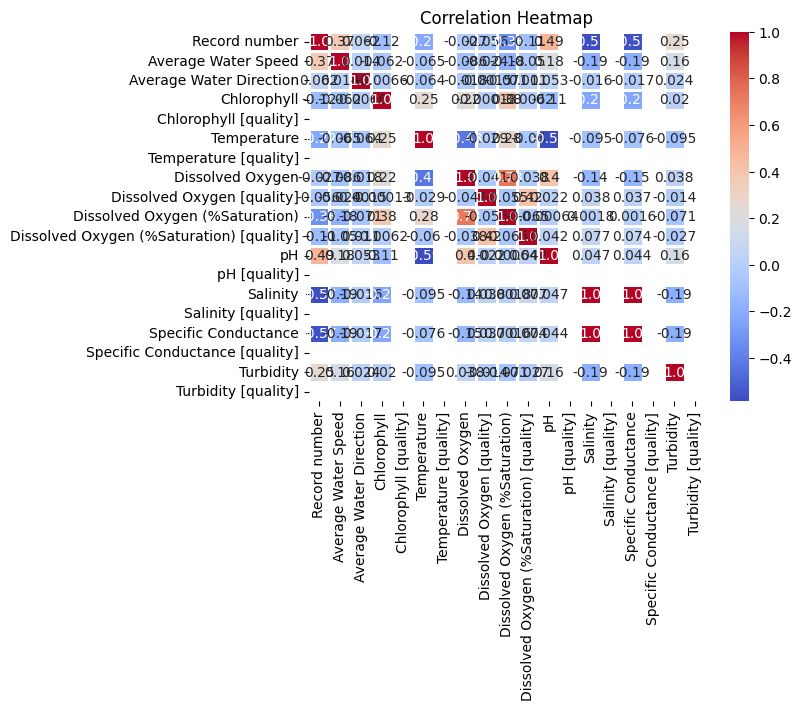

In [8]:
#heatmap to find correlation between tables
plt.Figure(figsize=(20,10))
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt=".2",linewidths=1)
plt.title("Correlation Heatmap")
plt.show

In [9]:
#elimantnated quality columns as they are affecting the heatmap properly
print(df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]',
       'Temperature', 'Temperature [quality]', 'Dissolved Oxygen',
       'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)',
       'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]',
       'Salinity', 'Salinity [quality]', 'Specific Conductance',
       'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]'],
      dtype='object')>


In [10]:
#updated Correlation Table for readability
corrMapp = ['Average Water Speed','Average Water Direction','Chlorophyll','Temperature','Dissolved Oxygen','Dissolved Oxygen (%Saturation)','pH','Salinity','Specific Conductance','Turbidity']
corr_matrix = df[corrMapp].corr()
print(corr_matrix)

                                Average Water Speed  Average Water Direction  \
Average Water Speed                        1.000000                 0.013916   
Average Water Direction                    0.013916                 1.000000   
Chlorophyll                               -0.061671                -0.006581   
Temperature                               -0.064742                -0.063955   
Dissolved Oxygen                          -0.085709                -0.017852   
Dissolved Oxygen (%Saturation)            -0.182273                -0.071468   
pH                                         0.184740                 0.053299   
Salinity                                  -0.192987                -0.016066   
Specific Conductance                      -0.189360                -0.016567   
Turbidity                                  0.162164                 0.023780   

                                Chlorophyll  Temperature  Dissolved Oxygen  \
Average Water Speed               -0.0616

<function matplotlib.pyplot.show(close=None, block=None)>

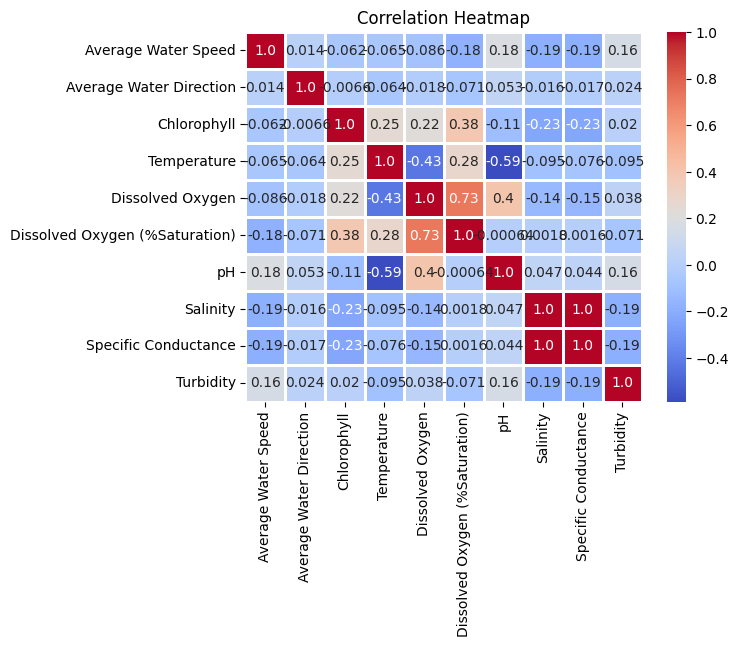

In [11]:
#new updated correlation table
plt.Figure(figsize=(20,10))
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt=".2",linewidths=1)
plt.title("Correlation Heatmap")
plt.show

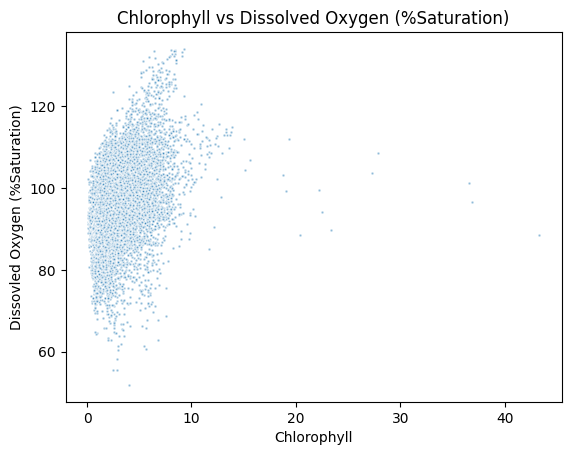

In [12]:
#chlorophyll vs dissolved oxygen because it is the powerhouse of the cell obv.

plt.Figure(figsize=(16,10))

plt.scatter(df['Chlorophyll'], df['Dissolved Oxygen (%Saturation)'], alpha=0.5, s=4,edgecolors='white')
plt.title('Chlorophyll vs Dissolved Oxygen (%Saturation)')
plt.xlabel('Chlorophyll')
plt.ylabel('Dissovled Oxygen (%Saturation)')
plt.show()

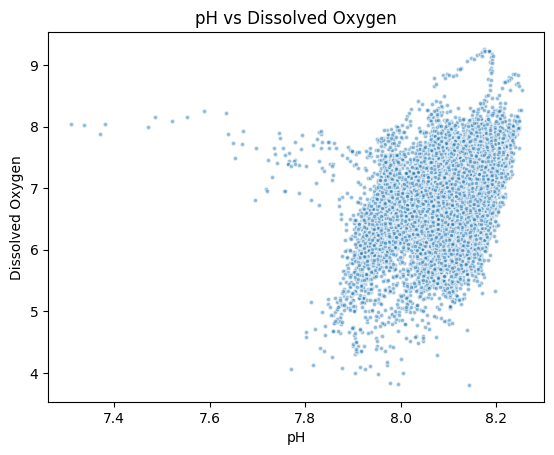

In [13]:
#with a value of .4 I was curious to see what these can be somewhat correlated
plt.Figure(figsize=(100,25))

plt.scatter(df['pH'], df['Dissolved Oxygen'], alpha=0.5, s=10,edgecolors='white')
plt.title('pH vs Dissolved Oxygen')
plt.xlabel('pH')
plt.ylabel('Dissolved Oxygen')
plt.show()

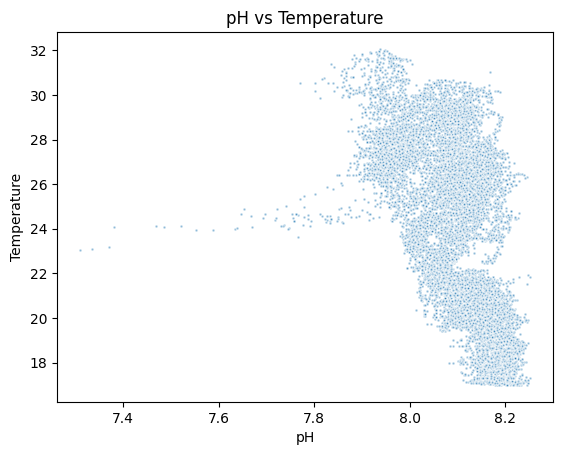

In [14]:
#
plt.Figure(figsize=(12,10))

plt.scatter(df['pH'],df['Temperature'], alpha=0.5,s=4,edgecolors='white')
plt.title('pH vs Temperature')
plt.xlabel('pH')
plt.ylabel('Temperature')
plt.show()

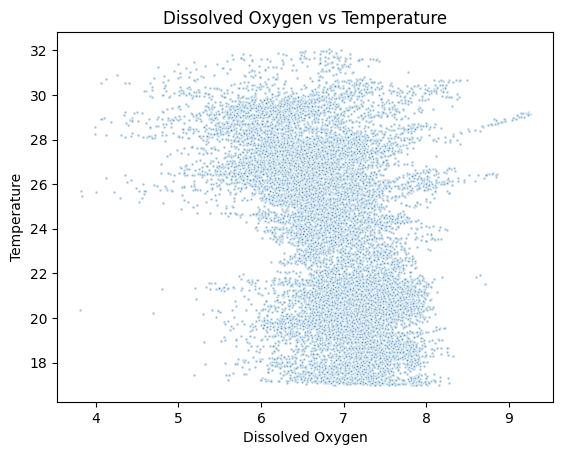

In [15]:
#after looking at pH vs Temperature and pH vs Dissolved Oxygen I was curious what the scatter plot looked like. 
plt.Figure(figsize=(12,19))

plt.scatter(df['Dissolved Oxygen'],df['Temperature'], alpha=0.5,s=4,edgecolors='white')
plt.title('Dissolved Oxygen vs Temperature')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Temperature')
plt.show()

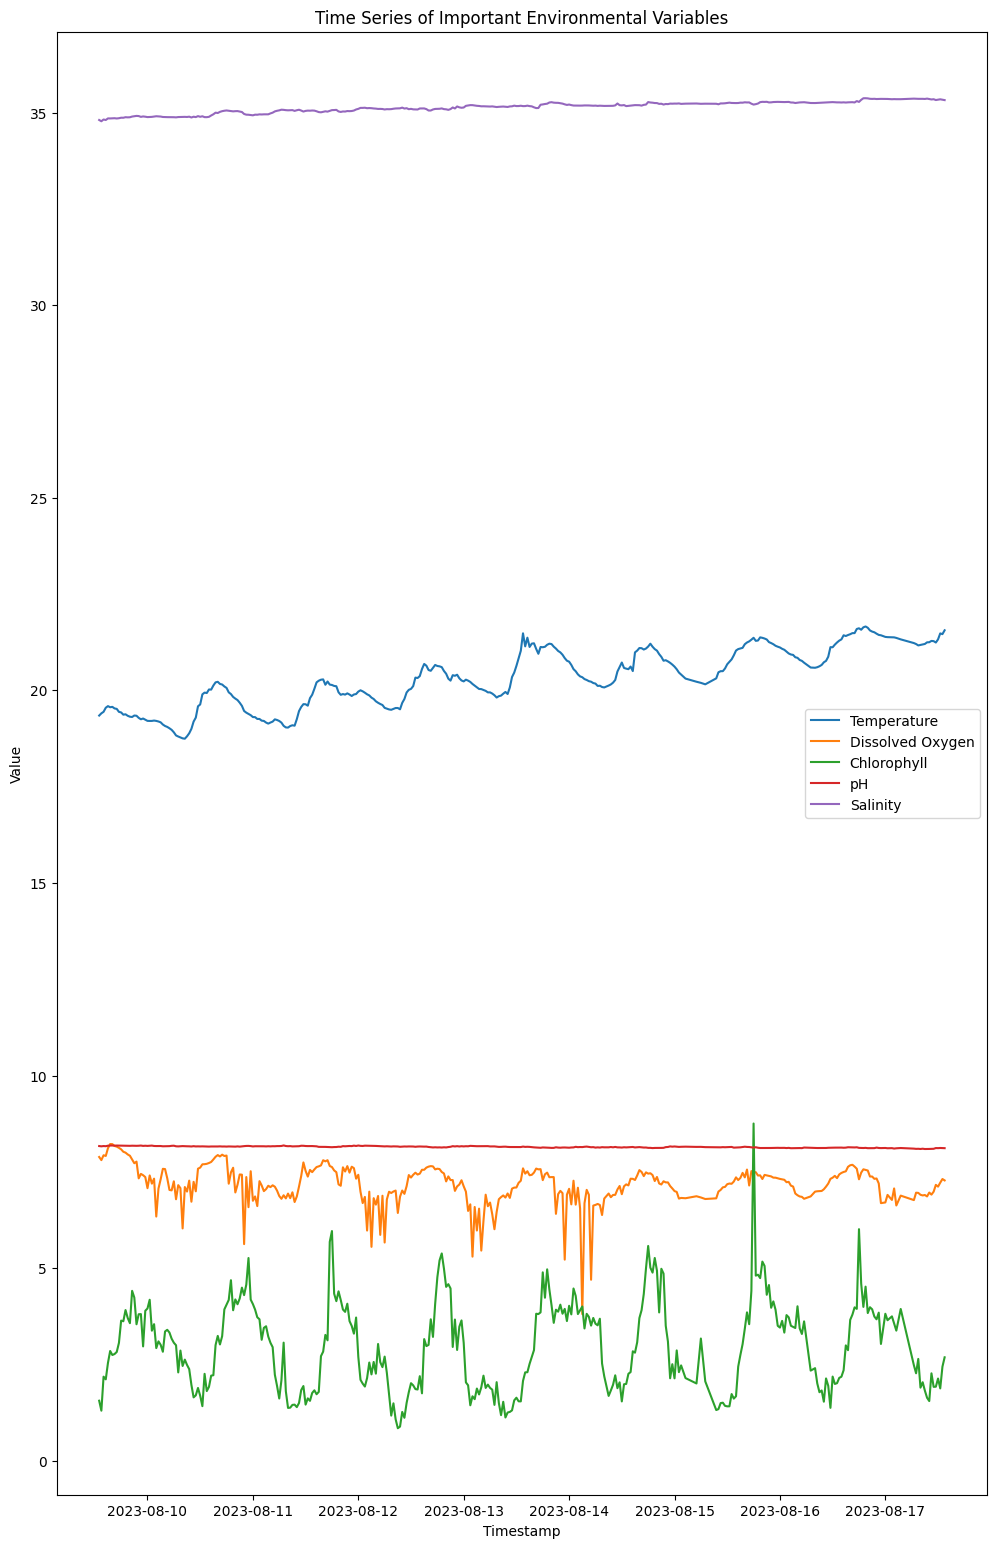

In [16]:
#Time Series Analysis
#Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df_sample = df.head(365)
plt.figure(figsize=(12, 19))
for col in ['Temperature', 'Dissolved Oxygen', 'Chlorophyll', 'pH', 'Salinity']:
    plt.plot(df_sample['Timestamp'], df_sample[col], label=col)

plt.legend()
plt.title('Time Series of Important Environmental Variables')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()


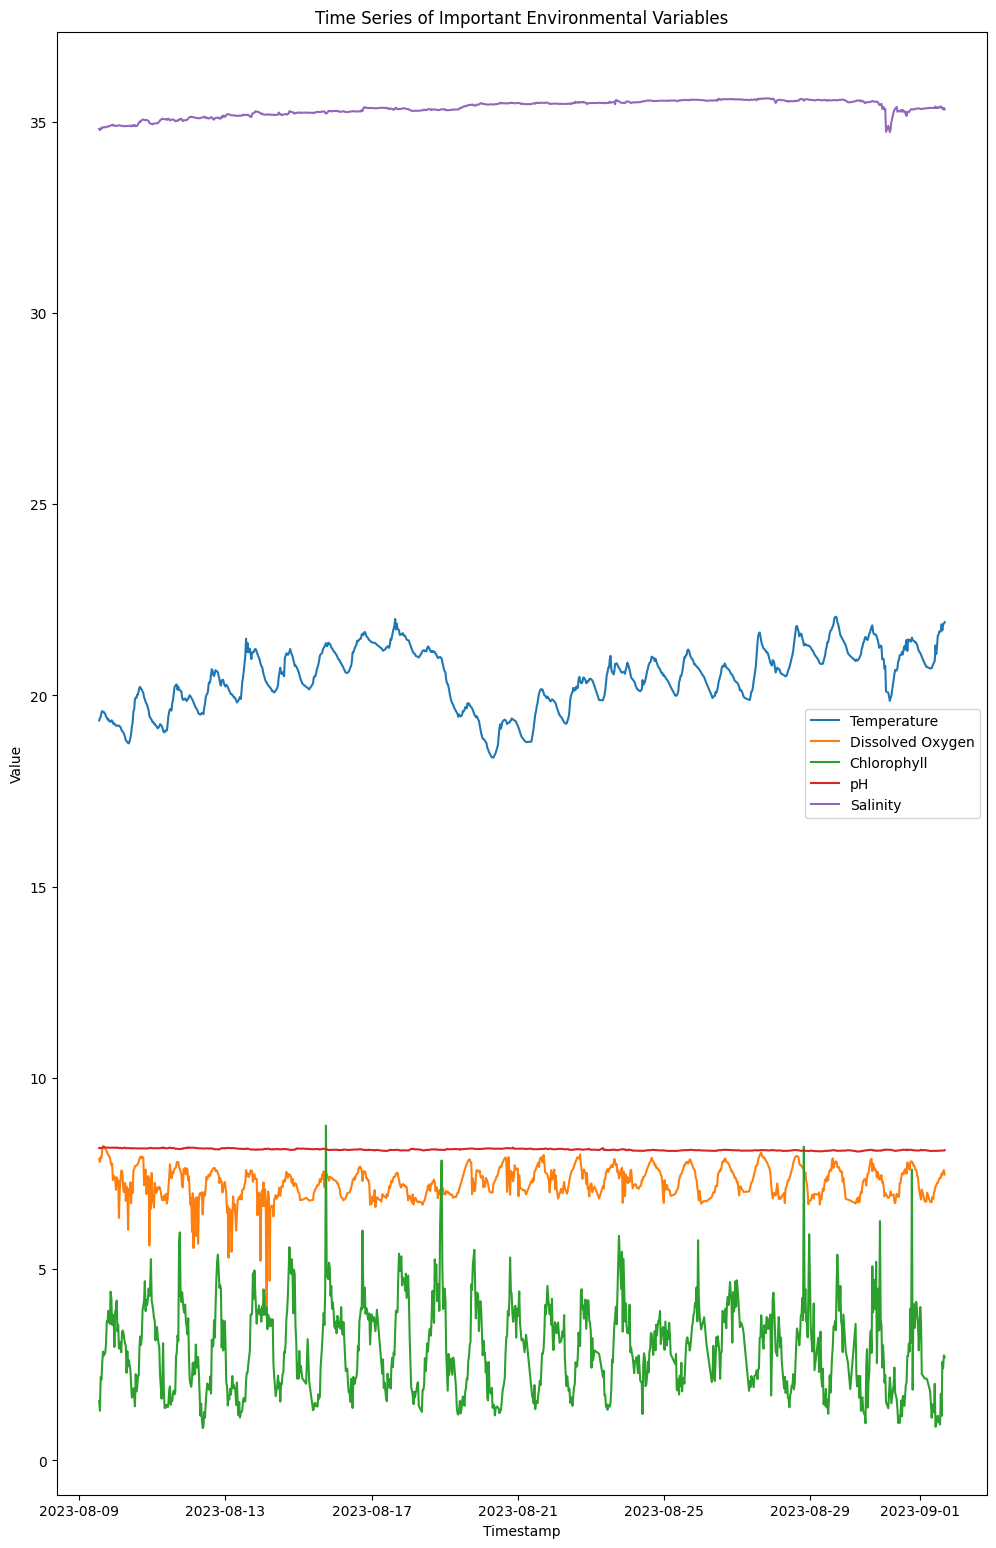

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df_sample = df.head(1000)
plt.figure(figsize=(12, 19))
for col in ['Temperature', 'Dissolved Oxygen', 'Chlorophyll', 'pH', 'Salinity']:
    plt.plot(df_sample['Timestamp'], df_sample[col], label=col)

plt.legend()
plt.title('Time Series of Important Environmental Variables')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()